### This is a exploratory data analysis on US accidents from the year 2000 to 2000. It is a huge dataset of over 2 million rows. It is my first time doing EDA on such a large dataset.

# IMPORTING DEPENDENCIES

In [160]:
import pandas as pd
import numpy as np

#for visualizations and dashboards
import folium
from folium import plugins
import chart_studio.plotly as py
import cufflinks as cf
import matplotlib.pyplot as plt
from dash.dependencies import Input, Output

import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import html
from dash import dcc

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


# DATA EXTRACTION

In [161]:
df = pd.read_csv("d:/US_Accidents_Dec21_updated.csv")

In [162]:
cols = ['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
       'Temperature(F)', 'Weather_Condition', 'Bump',
       'Crossing', 'Junction', 'No_Exit', 'Roundabout',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset']

df = df[cols]

<br>
<br>


# DATA CLEANING

In [163]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
       'Temperature(F)', 'Weather_Condition', 'Bump', 'Crossing', 'Junction',
       'No_Exit', 'Roundabout', 'Station', 'Stop', 'Traffic_Signal',
       'Sunrise_Sunset'],
      dtype='object')

In [164]:
df.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,6.179356e+01
std,4.787216e-01,5.363797e+00,1.831782e+01,1.862263e+01
min,1.000000e+00,2.456603e+01,-1.245481e+02,-8.900000e+01
25%,2.000000e+00,3.344517e+01,-1.180331e+02,5.000000e+01
50%,2.000000e+00,3.609861e+01,-9.241808e+01,6.400000e+01
75%,2.000000e+00,4.016024e+01,-8.037243e+01,7.600000e+01
max,4.000000e+00,4.900058e+01,-6.711317e+01,1.960000e+02


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   City               object 
 5   State              object 
 6   Temperature(F)     float64
 7   Weather_Condition  object 
 8   Bump               bool   
 9   Crossing           bool   
 10  Junction           bool   
 11  No_Exit            bool   
 12  Roundabout         bool   
 13  Station            bool   
 14  Stop               bool   
 15  Traffic_Signal     bool   
 16  Sunrise_Sunset     object 
dtypes: bool(8), float64(3), int64(1), object(5)
memory usage: 217.1+ MB


**We can see that there are alot of rows with missing data, so lets fix that.**

**Basically, what we will do is that for every numeric column, we will find the mean of that column's entries and replace the missing values in that column with that mean value. For non-numeric or object type columns, we will find the most entry with the most frequent value and replace the missing values in that column with that most frequent entry.**

In [166]:
df['City'].describe(include='object')

count     2845205
unique      11681
top         Miami
freq       106966
Name: City, dtype: object

In [167]:
df['City'].replace({np.NaN:"Miami"}, inplace=True)

In [168]:
df['Sunrise_Sunset'].describe(include='object')

count     2842475
unique          2
top           Day
freq      1811935
Name: Sunrise_Sunset, dtype: object

In [169]:
df['Sunrise_Sunset'].replace({np.NaN:"Day"}, inplace=True)

In [170]:
df['Temperature(F)']  = (df['Temperature(F)'] - 32) * 5/9    #converting temperature from Fahrenheit to Celsius

In [171]:
df.rename( columns = {"Temperature(F)":"Temperature(C)"}, inplace=True)

In [172]:
df['Temperature(C)'].describe()



count    2.776068e+06
mean     1.655198e+01
std      1.034591e+01
min     -6.722222e+01
25%      1.000000e+01
50%      1.777778e+01
75%      2.444444e+01
max      9.111111e+01
Name: Temperature(C), dtype: float64

In [173]:
df['Temperature(C)'].replace({np.NaN  : 18.37}, inplace=True)

In [174]:
df['Weather_Condition'].describe()

count     2774706
unique        127
top          Fair
freq      1107194
Name: Weather_Condition, dtype: object

In [175]:
df['Weather_Condition'].replace({np.NaN : 'Fair'}, inplace=True)

In [176]:
df.isnull().sum()   #Now, we removed all missing values

Severity             0
Start_Time           0
Start_Lat            0
Start_Lng            0
City                 0
State                0
Temperature(C)       0
Weather_Condition    0
Bump                 0
Crossing             0
Junction             0
No_Exit              0
Roundabout           0
Station              0
Stop                 0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

<br>


**Lets only consider the start time of the accident and ignore the end time, as there is not much difference between them.
Are there any accidents that happen for hours, unless you're stuck in a time loop ;).
After that, we will extract the year, month, weekday, day of the month, hour, and date from that one column**

In [177]:
df['Start_Time'] =  pd.to_datetime(df['Start_Time'])  #Convert the datatype of start_time column to DateTime

In [178]:
#Extracting different values from the date
df['Year'] = df['Start_Time'].dt.year
df['WeekDay'] = df['Start_Time'].dt.weekday

df['Hour'] = df['Start_Time'].dt.hour



In [179]:
df.drop(columns = ['Start_Time'], inplace=True)  #lets now drop both this column


<br>
<br>

# ANALYSIS AND VISUALIZATIONS

**Lets check the states with the most accidents**

In [180]:
df['Total_accident'] = 1  #this one line will help alot further in the in eda
statewise = df.groupby(['State'])[['Total_accident']].sum()
statewise.sort_values(by = ['Total_accident'], ascending =False, inplace=True)

**Clearly, California and Florida are the states with most accidents, as depicted below**

In [181]:
state_fig = px.bar(statewise.head(49), y='Total_accident', x=statewise.head(49).index,text="Total_accident",
             color=statewise.head(49).index, title="NO. OF ACCIDENTS IN DIFFERENT STATES")
# Put bar total value above bars
state_fig.update_traces( textposition='outside')

state_fig.update_layout(xaxis_tickangle=-45, xaxis_title="States", yaxis_title="No. of accidents", title_font_color = "red", width=1000)



<br>



**Checking accidents occured in every year**

In [182]:
yearly = df.groupby(["Year"])[['Total_accident']].sum()
yearly = yearly.reset_index()

In [183]:
trend = px.bar(yearly, y='Total_accident', x='Year',text="Total_accident", color="Year",
            title = "BAR CHART SHOWING TOTAL ACCIDENTS OCCURED YEARLY")
# Put bar total value above bars
trend.update_traces( textposition='outside')

trend.update_layout(xaxis_tickangle=-90, xaxis_title="Years", yaxis_title="No. of accidents", title_font_color = "red", width=700)


<br>


**Now lets extract the top 10 states with most accidents and plot a line plot depicting their trend of accidents over the course of years.**

In [184]:
top10 = df['State'].value_counts()[:10].index.tolist() 
#get the top 10 states where highest number of accidents occured

top10

['CA', 'FL', 'TX', 'OR', 'VA', 'NY', 'PA', 'MN', 'NC', 'SC']

In [185]:

df['State'].value_counts()[:10]
#this line of code proves that the top 10 states with most accidents is the same as the output of the previous cell

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

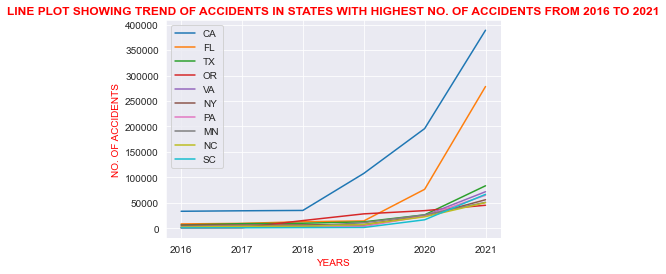

In [186]:
state_year = pd.DataFrame(df.groupby(["State","Year"])["Total_accident"].sum())
state_year = state_year.sort_values(by = ["Total_accident"], ascending = False)
yrs = [2021, 2020, 2019, 2018, 2017, 2016]

plt.plot(yrs, state_year.loc[top10[0], :].values)
plt.plot(yrs, state_year.loc[top10[1], :].values)
plt.plot(yrs, state_year.loc[top10[2], :].values)
plt.plot(yrs, state_year.loc[top10[3], :].values)
plt.plot(yrs, state_year.loc[top10[4], :].values)
plt.plot(yrs, state_year.loc[top10[5], :].values)
plt.plot(yrs, state_year.loc[top10[6], :].values)
plt.plot(yrs, state_year.loc[top10[7], :].values)
plt.plot(yrs, state_year.loc[top10[8], :].values)
plt.plot(yrs, state_year.loc[top10[9], :].values)

plt.legend(top10)
plt.xlabel("YEARS", color="Red")
plt.ylabel("NO. OF ACCIDENTS", color = "red")
plt.title("LINE PLOT SHOWING TREND OF ACCIDENTS IN STATES WITH HIGHEST NO. OF ACCIDENTS FROM 2016 TO 2021", color = "red", fontweight="bold");

<br>


**Visualizing accidents grouped by cities....Miami and Los Angeles are at the 1st and 2nd, respectively.**

In [187]:
city = df.groupby(["City"])[['Total_accident']].sum()
city.sort_values(by = ["Total_accident"], ascending=False, inplace=True)

city_fig = px.bar(city.head(40), y='Total_accident', x=city.head(40).index,text="Total_accident", color=city.head(40).index,
            title = "BAR CHART SHOWING TOP 40 CITIES WITH HIGHEST NUMBER OF ACCIDENTS")
# Put bar total value above bars
city_fig.update_traces( textposition='outside')

# Rotate labels 45 degrees
city_fig.update_layout(xaxis_tickangle=-90, xaxis_title="Cities", yaxis_title="No. of accidents", title_font_color = "red", width=1000)



<br>


**Checking the total accidents occured at different temperatures....At 18.37 C, most accidents occured, almost reaching 70,000**

In [188]:
temp = df.groupby(['Temperature(C)'])[["Total_accident"]].sum()
temp = temp.sort_values(by = ["Total_accident"], ascending=False)


fig = px.bar(temp.head(20), y='Total_accident', x=temp.head(20).index,text="Total_accident", color=temp.head(20).index, title="NO. OF ACCIDENTS AT DIFFERENT TEMPERATURES")
# Put bar total value above bars
fig.update_traces( textposition='outside')

# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45, xaxis_title="Temperatures", yaxis_title="No. of accidents", title_font_color="red")



**Lets check the severity of the accidents and plot them**

In [189]:
sever = df.groupby(['Severity'])[['Total_accident']].sum()
sever['Severity'] = ["Low", "Medium", "High", "Severe"]
sever


,Total_accident,Severity
Severity,,
1,26053,Low
2,2532991,Medium
3,155105,High
4,131193,Severe


In [190]:


fig = px.bar(sever.Severity, y=sever.Total_accident, x=sever.Severity, color=sever.head(20).index, title="BAR PLOT SHOWING DEGREE OF SEVERITY OF ACCIDENTS")
# Put bar total value above bars
fig.update_traces( textposition='outside')

# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45, xaxis_title="Severity", yaxis_title="No. of accidents", title_font_color="red")



In [191]:

'''
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0.25, 0, 0.2, 0.2]
pie_fig1 = sever['Total_accident'].plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,     
                            colors=colors_list,
                            explode=explode)

plt.title('PIE CHART SHOWING SEVERITY OF ACCIDENTS', y=1.02, color="red", fontweight="bold", fontsize=12) 

plt.axis('equal') 
plt.legend(labels=sever['Severity'], loc='upper left');

'''
sever_fig = px.pie(sever, values='Total_accident', names='Severity', title='Percentage of severity of accidents')
sever_fig.update_layout(piecolorway=['red', 'blue', 'green', 'yellow'], width=450)

sever_fig.show()



**Both the pie chart and bar chart show that more than 80% of accidents(about 2.5 million) were of medium severity while 5.5% of the accidents(around 155k) were of high severity.**

**Grouping by Bump and Crossing and then checking the number of accidents**

In [192]:
bump_crossing=df.groupby(["Bump", "Crossing"])[["Total_accident"]].sum()
bump_crossing=bump_crossing.reset_index()
fig = px.bar(bump_crossing, x="Bump", y="Total_accident",
             color='Crossing', barmode='group', title='NO. OF ACCIDENTS GROUPED BY BUMP AND CROSSING')

fig.update_layout(title_font_color = "red", width=500, height=380)

In [193]:
bump_crossing

,Bump,Crossing,Total_accident
0,False,False,2644364
1,False,True,199957
2,True,False,766
3,True,True,255


**It is clear that most accidents occured when there was no bump and crossing, about 2.6 milllion.**
**When there was no bump but there was a crossing, about 199k accidents occured.**
**When there was both bump and ceossing, the accidents were so small that they can not be seen in the plot above, we can see them in the dataframe thought.**
**Same goes for the case ehen there was a but no crossing, the results were very small and can not be seen, though are present in the dataframe above**

<br>

<br>


**Lets check whether at day or at night, most accidents occured.**

In [194]:
sunrise = df.groupby(['Sunrise_Sunset'])[['Total_accident']].sum()
sunrise= sunrise.reset_index()
sun_fig = px.pie(sunrise, values='Total_accident', names='Sunrise_Sunset', title='Total accidents occured during day and night')
sun_fig.update_layout(piecolorway=['yellow', 'blue'], width=450, plot_bgcolor="aqua")
sun_fig.show()


**Now lets check whether the number of accidents occured at day or night, but over the course of the years.**

In [195]:
sunrise_yrs = df.groupby(['Year', 'Sunrise_Sunset'])[['Total_accident']].sum()
sunrise_yrs = sunrise_yrs.reset_index()


day_night_fig = px.bar(sunrise_yrs, x="Year", y="Total_accident",
             color='Sunrise_Sunset', barmode='group', title='NO. OF ACCIDENTS IN DIFFERENT YEARS GROUPED BY DAY OR NIGHT')
day_night_fig.update_layout(title_font_color = "red")

In [196]:
#A little more insight to watch, didn't have the energy to visualize it
groups = df.groupby(["No_Exit", "Station", "Roundabout", "Junction", "Stop"])[['Total_accident']].sum()
groups.style.background_gradient(cmap="Spectral")


<br>

**On which day most accidents occured, grouped by years**

In [197]:
day = df.groupby(['Year','WeekDay'])[['Total_accident']].sum()
day = day.reset_index()
fig = px.bar(day, x="WeekDay", y="Total_accident", color='Year', barmode='group', title='NO. OF ACCIDENTS IN DIFFERENT YEARS GROUPED BY WEEKDAY')
fig.update_layout(title_font_color = "red")

**Grouping accidents by traffic signal, True means there was a traffic signal and False means there was no traffic signal.**

In [198]:
traffic = df.groupby(['Traffic_Signal'])[['Total_accident']].sum()
traffic = traffic.reset_index()
traffic_fig = px.pie(traffic, values='Total_accident', names='Traffic_Signal', title='Total accidents grouped by traffic signal')
traffic_fig.update_layout(piecolorway = ['cyan', 'purple'], width=450,  legend=dict(yanchor="bottom", y=0.99, xanchor="left", x=0.01))
traffic_fig.show()

**Accidents grouped by hours... 17th hour (5 pm) has the most accidents**

In [199]:
hours = df.groupby(['Hour'])[['Total_accident']].sum()
hours = hours.reset_index()
hour = px.bar(hours, x="Hour", y="Total_accident", title='NO. OF ACCIDENTS GROUPED BY HOURS')
hour.update_layout(title_font_color = "red", width=700)

## GENERATING MAPS WITH ACCIDENTS MARKERED ON THEM....

**Now we will generate a map for Los Angeles using Folium and highlight the location of accidents as well.**

In [200]:
longitude = 30.9843
latitude = -91.9623
la_map = folium.Map(location=[longitude, latitude], zoom_start=2)
la_df = df[df['City']=='Los Angeles']
la_df = la_df.reset_index()


In [201]:
la_df.shape

(68956, 21)

In [147]:
incidents = plugins.MarkerCluster().add_to(la_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(la_df.Start_Lat, la_df.Start_Lng, la_df.State):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

In [148]:
la_map.save("D:/map.html")

# CREATING DASHBOARD APPLICATION

***Now we will create a dashboard that will show our findings in a more presentable manner.***

In [202]:
ap = dash.Dash()

# Get the layout of the application and adjust it.
ap.layout = html.Div(children=[html.H1('US ACCIDENTS STATS FROM 2016 TO 2021', 
                                    style={'textAlign': 'center',
                                        'color': 'white', 'background-color':'black', 
                                        'font-size': 40}),
                               html.P("There were more than 2.5 million accidents in the US from 2016 to 2021.",
                                     style={'background-color':'cyan', 'color':'black'}),

                                html.P('PIE CHARTS',style = {'text-align':'centre','color' : 'black',
                                                             'background-color':'cyan', 'width':'170px'}),
                               
                               html.Div([html.Div(dcc.Graph(figure = sever_fig)),
                                         html.Div(dcc.Graph(figure = sun_fig)),
                                        html.Div(dcc.Graph(figure = traffic_fig))],
                                         style = {'display':'flex', 'justify-content':'centre'}),
                               
                               html.Div(dcc.Graph(figure = city_fig)),
                               
                               html.Div(dcc.Graph(figure = state_fig)),
                               
                               html.Div([html.Div(dcc.Graph(figure = trend)),
                                         html.Div(dcc.Graph(figure = hour))],
                                       style = {'display':'flex', 'justify-content':'space-between'}),
                               
                               html.P("Now lets generate a map for Los Angeles and highlight the accidents occured. When pointing on the markers, we get to see the corresponding state which is California",
                                     style={'background-color':'cyan', 'color':'black'}), 
                               
                               html.Iframe(id="map", srcDoc = open("D:/map.html", "r").read(), width="100%", height="600")])



In [ ]:
if __name__ == '__main__': 
    ap.run_server(port=4009)

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is running on http://127.0.0.1:4009/

Dash is run